<h2 align="center" style="color:purple">Phase 2: AtliQ0 Bank Credit Card Project</h2>

### Business Analysis and launch of AB testing: Targeting Untapped Market

### Insights specific to customers with age group of 18 - 25
1. People with age group of 18 -25 accounts to ~25% of customer base in the data
2. Avg annual income of this age group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and max credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Avg transaction amount made with credit cards is also low compared to other groups
5. Top 3 most used shopping products categories  : Electronics, Fashion & Apparel, Beauty & Personal care

## (1) Pre-Campaign

We want to do a trial run for our new credit card. For this we need to figure out (1) How many customers do we need for our A/B testing. We will form a control and test group. For both of these groups we can figure out number of customers we need based on the statistical power and effect size that we agree upon after discussing with business. We will use 

In [1]:
import statsmodels.stats.api as sms
import statsmodels.api as sm

import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
alpha = 0.05
power = 0.8
effect_size = 0.2

In [3]:
sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')

393.40569300025135

For effect size 2 we need 393 customers. We have to keep in mind budgeting restrictions while running this campaign hence let us run this for different effect sizes and discuss with business to find out which sample size would be optimal

In [4]:
# Calculate the required sample size for different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size per Group: {sample_size:.2f}")

Effect Size: 0.1, Required Sample Size per Group: 1570.73
Effect Size: 0.2, Required Sample Size per Group: 393.41
Effect Size: 0.3, Required Sample Size per Group: 175.38
Effect Size: 0.4, Required Sample Size per Group: 99.08
Effect Size: 0.5, Required Sample Size per Group: 63.77
Effect Size: 1, Required Sample Size per Group: 16.71


Based on business requirements, the test should be capable of detecting a minimum 0.4 standard deviation difference between the control and test groups. For the effect size 0.4, we need 100 customers and when we discussed with business, 100 customers is ok in terms of their budgeting constraints for this trail run

#### Forming control and test groups

1.We have identified approximately 246 customers within the age group of 18 to 25. From this pool, we will select 100 customers for the initial campaign launch.

2.The campaign is launched for 100 customers, as determined by the effective size calculation and by considering budgeting costs, and will run campaign for a duration of 2 months

3.Got a conversion rate of ~40% ( implies 40 out of 100 customers in test group started using credit card)

4.To maintain a similar sample size, a control group consisting of 40 customers will be created. Importantly, this control group will be completely exclusive of initial 100 customers used as test group.

5.So now we have 40 customers in each of control and test groups

##### At the end of the 2-month campaign period (from 09-10-23 to 11-10-23), we obtained daily data showing the average transaction amounts made by the entire group of 40 customers in both the control and test groups using existing and newly launched credit cards respectively

##### The key performance indicator (KPI) for this AB test aims to enhance average transaction amounts facilitated by the new card

## (2) Post-Campaign

## Two Sample Z Test for Our Hypothesis Testing

In [5]:
df_input = pd.read_csv(r"D:\Ashish Doc\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\Phase_2_Data\avg_transactions_after_campaign.csv")

df_input.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


In [6]:
df_input.shape

(62, 3)

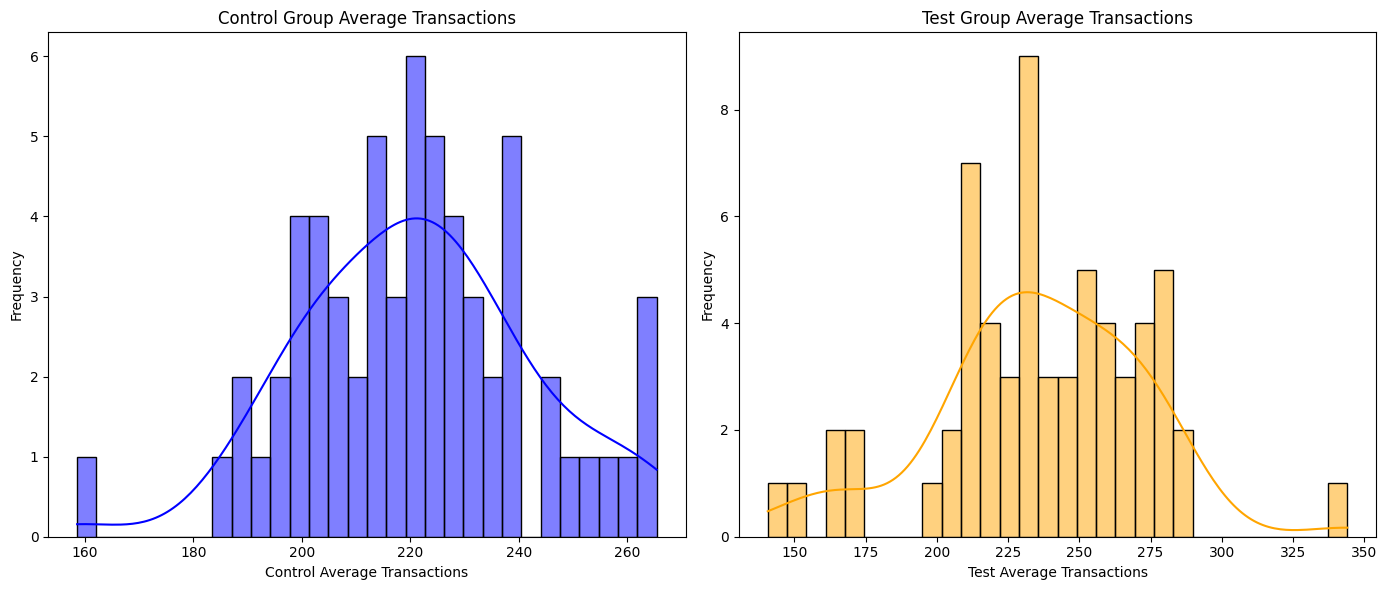

In [7]:
# Let's look at distributions of avg transactions amounts in both groups
# Create a 1x2 grid of subplots

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Plot histogram for Control Group
sns.histplot(df_input['control_group_avg_tran'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Control Group Average Transactions')
axes[0].set_xlabel('Control Average Transactions')
axes[0].set_ylabel('Frequency')

# Plot histogram for Test Group
sns.histplot(df_input['test_group_avg_tran'], bins=30, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Test Group Average Transactions')
axes[1].set_xlabel('Test Average Transactions')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Perform Hypothesis Testing Using Two Sample Z-test

In [8]:
control_mean = df_input['control_group_avg_tran'].mean()
control_std = df_input['control_group_avg_tran'].std()

print(f"Control Group - Mean: {control_mean}, Std Dev: {control_std}")

Control Group - Mean: 221.1751612903226, Std Dev: 21.35919211202701


In [9]:
test_mean = df_input['test_group_avg_tran'].mean()
test_std = df_input['test_group_avg_tran'].std()

print(f"Test Group - Mean: {test_mean}, Std Dev: {test_std}")

Test Group - Mean: 235.9835483870968, Std Dev: 36.658082109186374


In [10]:
sample_size = df_input.shape[0]

print(f"Sample Size per Group: {sample_size}")

Sample Size per Group: 62


In [11]:
a = control_std**2 / sample_size
b = test_std**2 / sample_size

z_score = (test_mean - control_mean) / np.sqrt(a + b)

print(f"Z-Score: {z_score}")

Z-Score: 2.748297374569113


In [12]:
z_critical = st.norm.ppf(1 - alpha)  # right-tailed test

print(f"Critical Z-Value for alpha={alpha}: {z_critical}")

Critical Z-Value for alpha=0.05: 1.6448536269514722


In [13]:
if z_score > z_critical:
    print("Reject the null hypothesis: Significant difference found.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")


Reject the null hypothesis: Significant difference found.


In [14]:
p_value = 1 - st.norm.cdf(z_score)  # right-tailed test
print(f"P-Value: {p_value}")

P-Value: 0.0029952824622024865


In [15]:
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference found.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")


Reject the null hypothesis: Significant difference found.


In [16]:
# Performing Z-test using statsmodels
z_statistic, p_value = sm.stats.ztest( df_input['test_group_avg_tran'],df_input['control_group_avg_tran'],alternative = 'larger')
z_statistic, p_value

(np.float64(2.7482973745691135), np.float64(0.002995282462202502))

In [17]:
if z_statistic > z_critical:
    print("Reject the null hypothesis: Significant difference found.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

Reject the null hypothesis: Significant difference found.


In [18]:
test_group_confidence_interval = st.norm.interval(0.95, loc=test_mean, scale=test_std/np.sqrt(sample_size))

print(f"Test Group 95% Confidence Interval: {test_group_confidence_interval}")

Test Group 95% Confidence Interval: (np.float64(226.85877713642867), np.float64(245.1083196377649))
